# Yelp regression 

The notebook develops a multilinear regresion model for Yelp ratings of a restaurant. The dataset used contains different restaurant features and their Yelp ratings. The model uses real life data from Yelp provided to Codeacademy that is not publically distributed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Loading and merging data

In [2]:
#loading data
businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

#setting display
pd.options.display.max_columns=60
pd.options.display.max_colwidth=60

In [3]:
#inspecting data
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': '...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesd...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcc...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeq...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': F...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesd...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Se...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [4]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [5]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [6]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1'...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Su...",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-...",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu...",1,4


In [7]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [8]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [9]:
#finding whether there are duplicate entries for a business and length of data
businesses_uniq = businesses.business_id.unique()
businesses_nouniq = businesses.business_id
print(len(businesses_uniq), len(businesses_nouniq))

188593 188593


In [10]:
#merging files to one on business_id
df = businesses.merge(reviews, how='left', on='business_id').\
                merge(users, how='left', on='business_id').\
                merge(checkins, how='left', on='business_id').\
                merge(tips, how='left', on='business_id').\
                merge(photos, how='left', on='business_id' )
print(len(df))

188593


In [11]:
df.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,time,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': '...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesd...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16...",11.0,18.0,38.0,6.0,NaN,NaN
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcc...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeq...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,{'Sun-1': 1},0.0,1.0,66.0,1.0,29.0,1.0
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': F...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesd...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,"{'Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1': 1, 'Sat-17...",2.0,5.0,32.0,1.0,NaN,NaN
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.375000,68.000000,0.250000,{'Wed-18': 1},1.0,0.0,NaN,NaN,NaN,NaN
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Se...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1,1412.750000,1015.500000,0.372550,0,0,4,137.750000,2570.000000,26.750000,528.250000,4.250000,"{'Thu-14': 1, 'Thu-20': 1}",2.0,0.0,NaN,NaN,NaN,NaN


## Cleaning data

In [12]:
#dropping list of features as not in scope of assignment
drop_list=['address',
           'attributes',
           'business_id',
           'categories',
           'city','hours',
           'is_open','latitude',
           'longitude',
           'name',
           'neighborhood',
           'postal_code',
           'state',
           'time']

df.drop(drop_list, axis=1, inplace=True)

In [13]:
#finding data types
print(df.dtypes)


alcohol?                        int64
good_for_kids                   int64
has_bike_parking                int64
has_wifi                        int64
price_range                     int64
review_count                    int64
stars                         float64
take_reservations               int64
takes_credit_cards              int64
average_review_age            float64
average_review_length         float64
average_review_sentiment      float64
number_funny_votes              int64
number_cool_votes               int64
number_useful_votes             int64
average_number_friends        float64
average_days_on_yelp          float64
average_number_fans           float64
average_review_count          float64
average_number_years_elite    float64
weekday_checkins              float64
weekend_checkins              float64
average_tip_length            float64
number_tips                   float64
average_caption_length        float64
number_pics                   float64
dtype: objec

In [14]:
#finding duplicates
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
188588    False
188589    False
188590    False
188591    False
188592    False
Length: 188593, dtype: bool


In [15]:
#renaming a column
df.rename(columns={'alcohol?':'alcohol_served'}, inplace=True)

In [16]:
#finding empty values and filling them with 0 as due to restaurants having other recorded values and these features being numerical
df.isna().any()

df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

## Exploratory data analysis

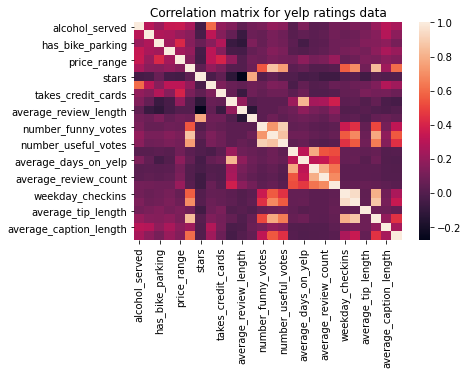

In [17]:
#finding correlations for explorative data analysis
corrMatrix = df.corr()
sn.heatmap(corrMatrix)
plt.title('Correlation matrix for yelp ratings data')
plt.show()

In [18]:
#correlations of y
print('Correlations for y/stars')
df.corr()['stars']

Correlations for y/stars


alcohol_served               -0.043332
good_for_kids                -0.030382
has_bike_parking              0.068084
has_wifi                     -0.039857
price_range                  -0.052565
review_count                  0.032413
stars                         1.000000
take_reservations            -0.024486
takes_credit_cards            0.037748
average_review_age           -0.125645
average_review_length        -0.277081
average_review_sentiment      0.782187
number_funny_votes            0.001320
number_cool_votes             0.043375
number_useful_votes          -0.000066
average_number_friends       -0.007629
average_days_on_yelp         -0.038061
average_number_fans          -0.031141
average_review_count         -0.066572
average_number_years_elite   -0.064419
weekday_checkins              0.004130
weekend_checkins              0.007863
average_tip_length           -0.052899
number_tips                   0.014038
average_caption_length        0.000040
number_pics              

In [19]:
#correlations of feature that had highest correlation to y
print('Correlations for average_review_sentiment')
df.corr()['average_review_sentiment']

Correlations for average_review_sentiment


alcohol_served                0.097188
good_for_kids                 0.073806
has_bike_parking              0.130448
has_wifi                      0.054699
price_range                   0.089349
review_count                  0.076265
stars                         0.782187
take_reservations             0.086728
takes_credit_cards            0.084171
average_review_age            0.003662
average_review_length        -0.133078
average_review_sentiment      1.000000
number_funny_votes            0.026948
number_cool_votes             0.079057
number_useful_votes           0.035839
average_number_friends        0.064738
average_days_on_yelp          0.083046
average_number_fans           0.064385
average_review_count          0.045517
average_number_years_elite    0.099804
weekday_checkins              0.025967
weekend_checkins              0.036676
average_tip_length           -0.003620
number_tips                   0.056595
average_caption_length        0.067912
number_pics              

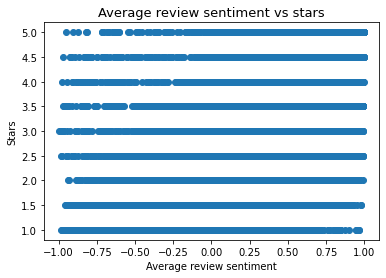

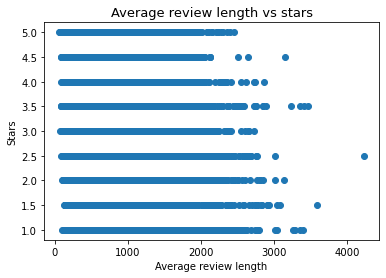

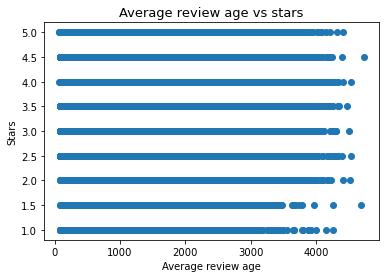

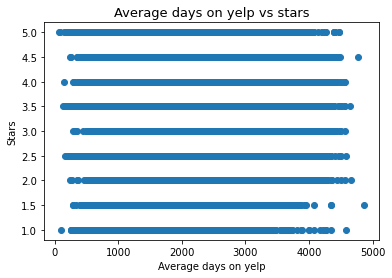

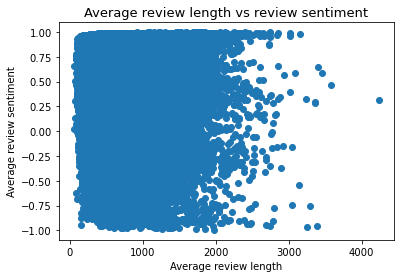

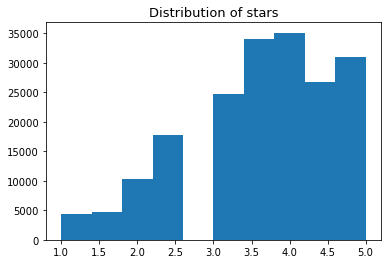

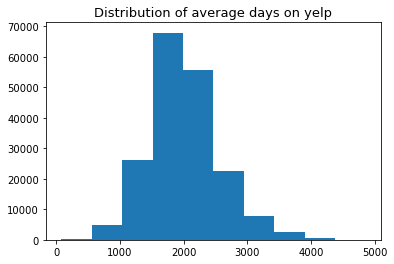

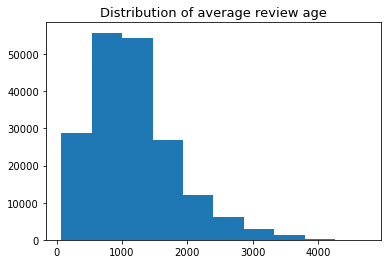

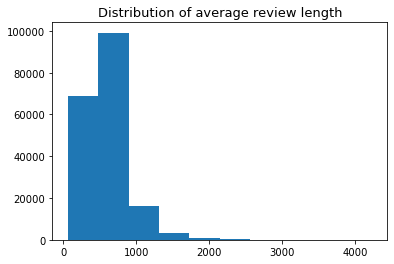

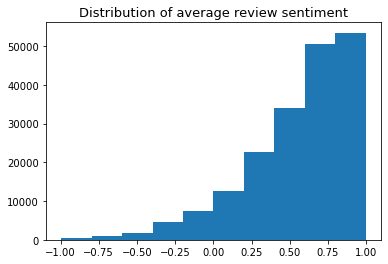

In [20]:
plt.scatter(df.average_review_sentiment, df.stars)
plt.title('Average review sentiment vs stars', fontsize = 13)
plt.xlabel('Average review sentiment', fontsize = 10)
plt.ylabel('Stars', fontsize = 10)
plt.show()

plt.scatter(df.average_review_length, df.stars)
plt.title('Average review length vs stars', fontsize = 13)
plt.xlabel('Average review length', fontsize = 10)
plt.ylabel('Stars', fontsize = 10)
plt.show()

plt.scatter(df.average_review_age, df.stars)
plt.title('Average review age vs stars', fontsize = 13)
plt.xlabel('Average review age', fontsize = 10)
plt.ylabel('Stars', fontsize = 10)
plt.show()

plt.scatter(df.average_days_on_yelp, df.stars)
plt.title('Average days on yelp vs stars', fontsize = 13)
plt.xlabel('Average days on yelp', fontsize = 10)
plt.ylabel('Stars', fontsize = 10)
plt.show()

plt.scatter(df.average_review_length, df.average_review_sentiment)
plt.title('Average review length vs review sentiment', fontsize = 13)
plt.xlabel('Average review length', fontsize = 10)
plt.ylabel('Average review sentiment', fontsize = 10)
plt.show()

plt.title('Distribution of stars', fontsize = 13)
plt.hist(df.stars)
plt.show()

plt.title('Distribution of average days on yelp', fontsize = 13)
plt.hist(df.average_days_on_yelp)
plt.show()

plt.title('Distribution of average review age', fontsize = 13)
plt.hist(df.average_review_age)
plt.show()

plt.title('Distribution of average review length', fontsize = 13)
plt.hist(df.average_review_length)
plt.show()


plt.title('Distribution of average review sentiment', fontsize = 13)
plt.hist(df.average_review_sentiment)
plt.show()

## Model building and features selection

In [21]:
#feature list of highest correlated feature
average_review_sentiment = ['average_review_sentiment']

#list of binary features without non significant take reservation
binary_features2 = ['alcohol_served',
                    'has_bike_parking',
                    'takes_credit_cards',
                    'good_for_kids',
                    'has_wifi']

#list of numeric features without non-significant features of funny votes, number of friendships, take resevations and review count
numeric_features2=['price_range',
                   'average_caption_length',
                   'number_pics',
                   'average_review_age',
                   'average_review_length',
                   'average_review_sentiment',
                   'number_cool_votes',
                   'number_useful_votes',
                   'average_tip_length',
                   'number_tips',
                   'average_days_on_yelp',
                   'average_number_fans',
                   'average_review_count',
                   'average_number_years_elite',
                   'weekend_checkins']

#list of all statistically significant features
all_features2 = binary_features2 + numeric_features2

new_list=['alcohol_served',
          'has_bike_parking',
          'price_range', 
          'average_review_age', 
          'average_review_length', 
          'average_review_sentiment', 
          'average_review_count', 
          'average_number_years_elite', 
          'average_tip_length']

In [22]:
# takes a list of features to model as a parameter - core of function from Codeacademy 
def model_these_features(feature_list):
    
    # 
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    sm_feat_X_train = sm.add_constant(X_train)
    est = sm.OLS(y_train, sm_feat_X_train)
    est2 = est.fit()
    print(est2.summary())
    
    # 
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))

In [23]:
#trying out the different feature sets
model_these_features(average_review_sentiment)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 2.379e+05
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:33:28   Log-Likelihood:            -1.4525e+05
No. Observations:              150874   AIC:                         2.905e+05
Df Residuals:                  150872   BIC:                         2.905e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [26]:
model_these_features(new_list)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 3.458e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:36:27   Log-Likelihood:            -1.3221e+05
No. Observations:              150874   AIC:                         2.644e+05
Df Residuals:                  150864   BIC:                         2.645e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [24]:
model_these_features(all_features2)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 1.608e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:33:30   Log-Likelihood:            -1.3052e+05
No. Observations:              150874   AIC:                         2.611e+05
Df Residuals:                  150853   BIC:                         2.613e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

With the features in scope of the excercise the model with all the features minus the non significant ones (feature list all_features2) with too high p-values produces highest R2 score. The model explains only 68% of the variation, which is a not as much as we would want to have.